# Naive Bayes

## 1. Import Libraries
###          We import necessary libraries like (pandas, Numpy, and Scikit_learn)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction
import warnings
warnings.filterwarnings('ignore')

## 2.load  and Explore Data
### We load our dataset into a pandas DataFrame.
### We explore the data to understand its structure, missing value, and summary statistics

In [3]:
NB = pd.read_csv(r"C:\Users\sonic\Downloads\mental_health_dataset.csv")
NB.head()

age      gender employment_status work_environment mental_health_history  \
0   56        Male          Employed          On-site                   Yes   
1   46      Female           Student          On-site                    No   
2   32      Female          Employed          On-site                   Yes   
3   60  Non-binary     Self-employed          On-site                    No   
4   25      Female     Self-employed          On-site                   Yes   

  seeks_treatment  stress_level  sleep_hours  physical_activity_days  \
0             Yes             6          6.2                       3   
1             Yes            10          9.0                       4   
2              No             7          7.7                       2   
3              No             4          4.5                       4   
4             Yes             3          5.4                       0   

   depression_score  anxiety_score  social_support_score  productivity_score  \
0                28             17                    54                59.7   
1                30             11                    85                54.9   
2                24              7                    62                61.3   
3                 6              0                    95                97.0   
4                24             12                    70                69.0   

  mental_health_risk  
0               High  
1               High  
2             Medium  
3                Low  
4               High

In [3]:
NB.tail()

age  gender employment_status work_environment mental_health_history  \
9995   34  Female          Employed          On-site                   Yes   
9996   47    Male          Employed          On-site                   Yes   
9997   56  Female          Employed          On-site                   Yes   
9998   24    Male          Employed          On-site                   Yes   
9999   44    Male        Unemployed           Remote                    No   

     seeks_treatment  stress_level  sleep_hours  physical_activity_days  \
9995             Yes             5          6.1                       3   
9996              No             1          5.7                       3   
9997              No             1          8.3                       0   
9998             Yes             9          6.1                       0   
9999             Yes             5          6.4                       7   

      depression_score  anxiety_score  social_support_score  \
9995                 9             21                     8   
9996                 5             12                    45   
9997                 1             18                     7   
9998                28             21                    32   
9999                 1             16                    25   

      productivity_score mental_health_risk  
9995                90.0             Medium  
9996                90.8             Medium  
9997                99.2             Medium  
9998                56.7               High  
9999               100.0             Medium

In [4]:
NB.shape

(10000, 14)

In [5]:
NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

In [6]:
NB.isnull().sum()                         

age                       0
gender                    0
employment_status         0
work_environment          0
mental_health_history     0
seeks_treatment           0
stress_level              0
sleep_hours               0
physical_activity_days    0
depression_score          0
anxiety_score             0
social_support_score      0
productivity_score        0
mental_health_risk        0
dtype: int64

### We create a missing values chart.
isnull. sum() it will be shown Zero means nothing is missing.

<Axes: >

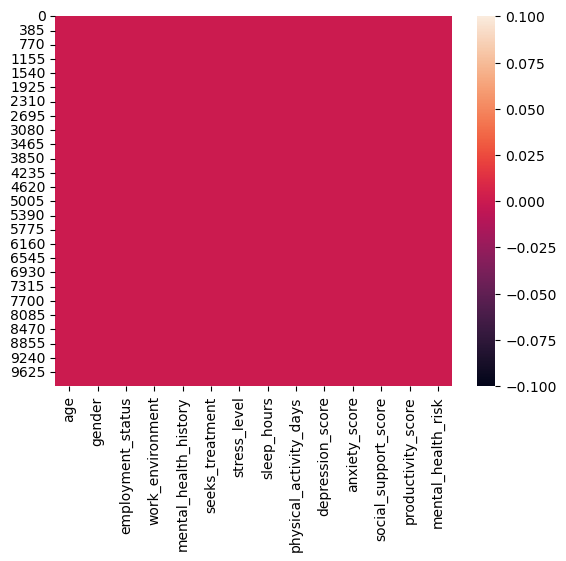

In [7]:
sns.heatmap(NB.isnull()) 

###  Summary statistics

In [8]:
NB.describe()

age  stress_level   sleep_hours  physical_activity_days  \
count  10000.000000  10000.000000  10000.000000            10000.000000   
mean      41.557600      5.572000      6.473000                3.505700   
std       13.749581      2.887741      1.473944                2.282737   
min       18.000000      1.000000      3.000000                0.000000   
25%       30.000000      3.000000      5.500000                2.000000   
50%       41.500000      6.000000      6.500000                4.000000   
75%       53.000000      8.000000      7.500000                5.000000   
max       65.000000     10.000000     10.000000                7.000000   

       depression_score  anxiety_score  social_support_score  \
count      10000.000000    10000.00000          10000.000000   
mean          15.039900       10.56180             50.117700   
std            8.990839        6.32264             29.229278   
min            0.000000        0.00000              0.000000   
25%            7.000000        5.00000             25.000000   
50%           15.000000       11.00000             50.000000   
75%           23.000000       16.00000             76.000000   
max           30.000000       21.00000            100.000000   

       productivity_score  
count        10000.000000  
mean            77.312210  
std             14.061202  
min             42.800000  
25%             65.800000  
50%             77.600000  
75%             89.200000  
max            100.000000

### Distribution of variables

In [9]:
import matplotlib.cm as cm

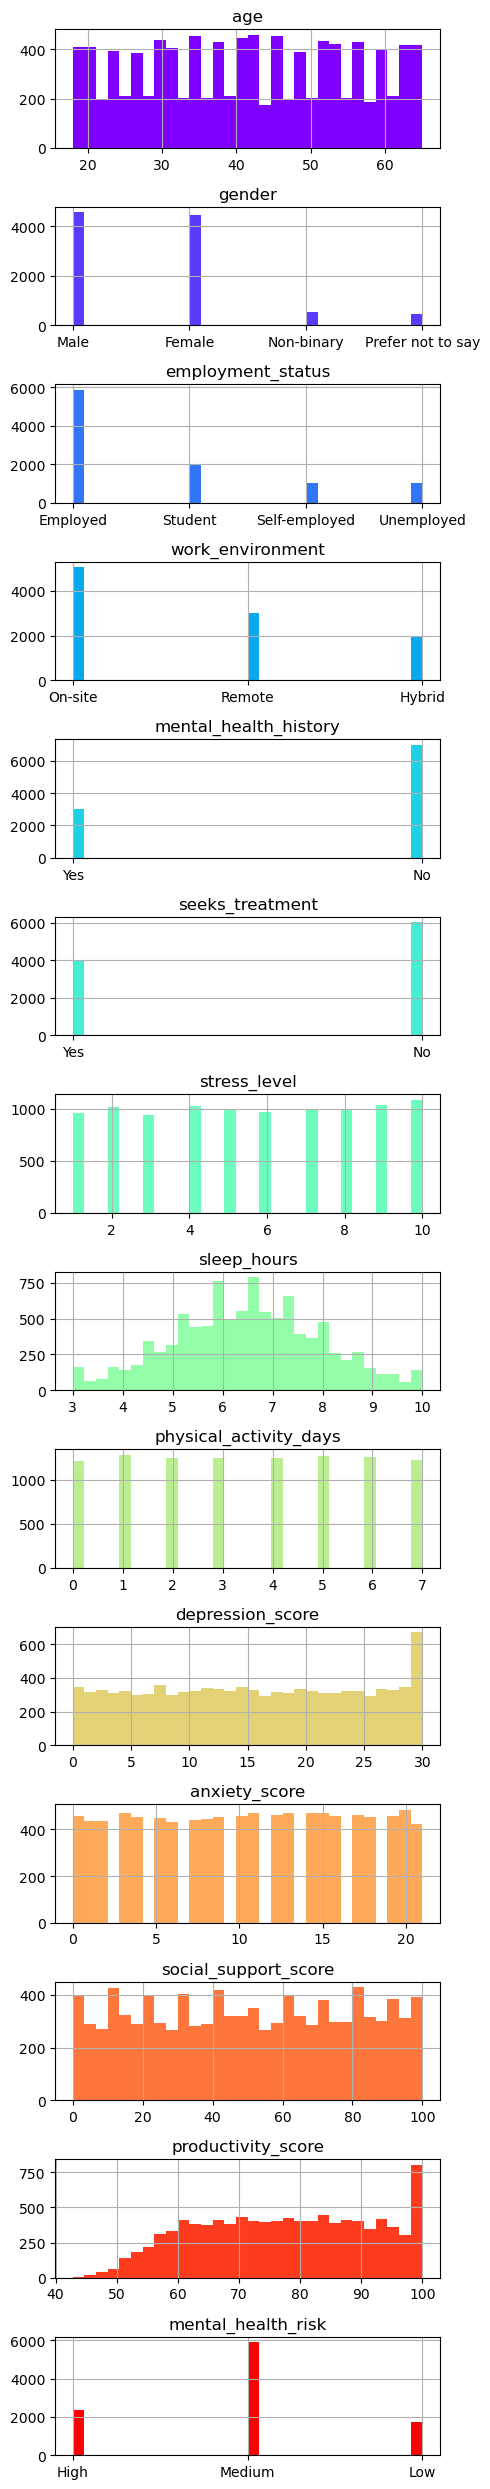

In [10]:
fig, axes = plt.subplots(nrows=len(NB.columns), ncols=1, figsize=(5, 25))
colors = plt.cm.rainbow(np.linspace(0, 1, len(NB.columns)))

for i, (column, ax) in enumerate(zip(NB.columns, axes)):
    NB[column].hist(ax=ax, bins=30, color=colors[i])
    ax.set_title(column)

plt.tight_layout()
plt.show()

## Visualize the data
Pairplot to visualize the relationships between features


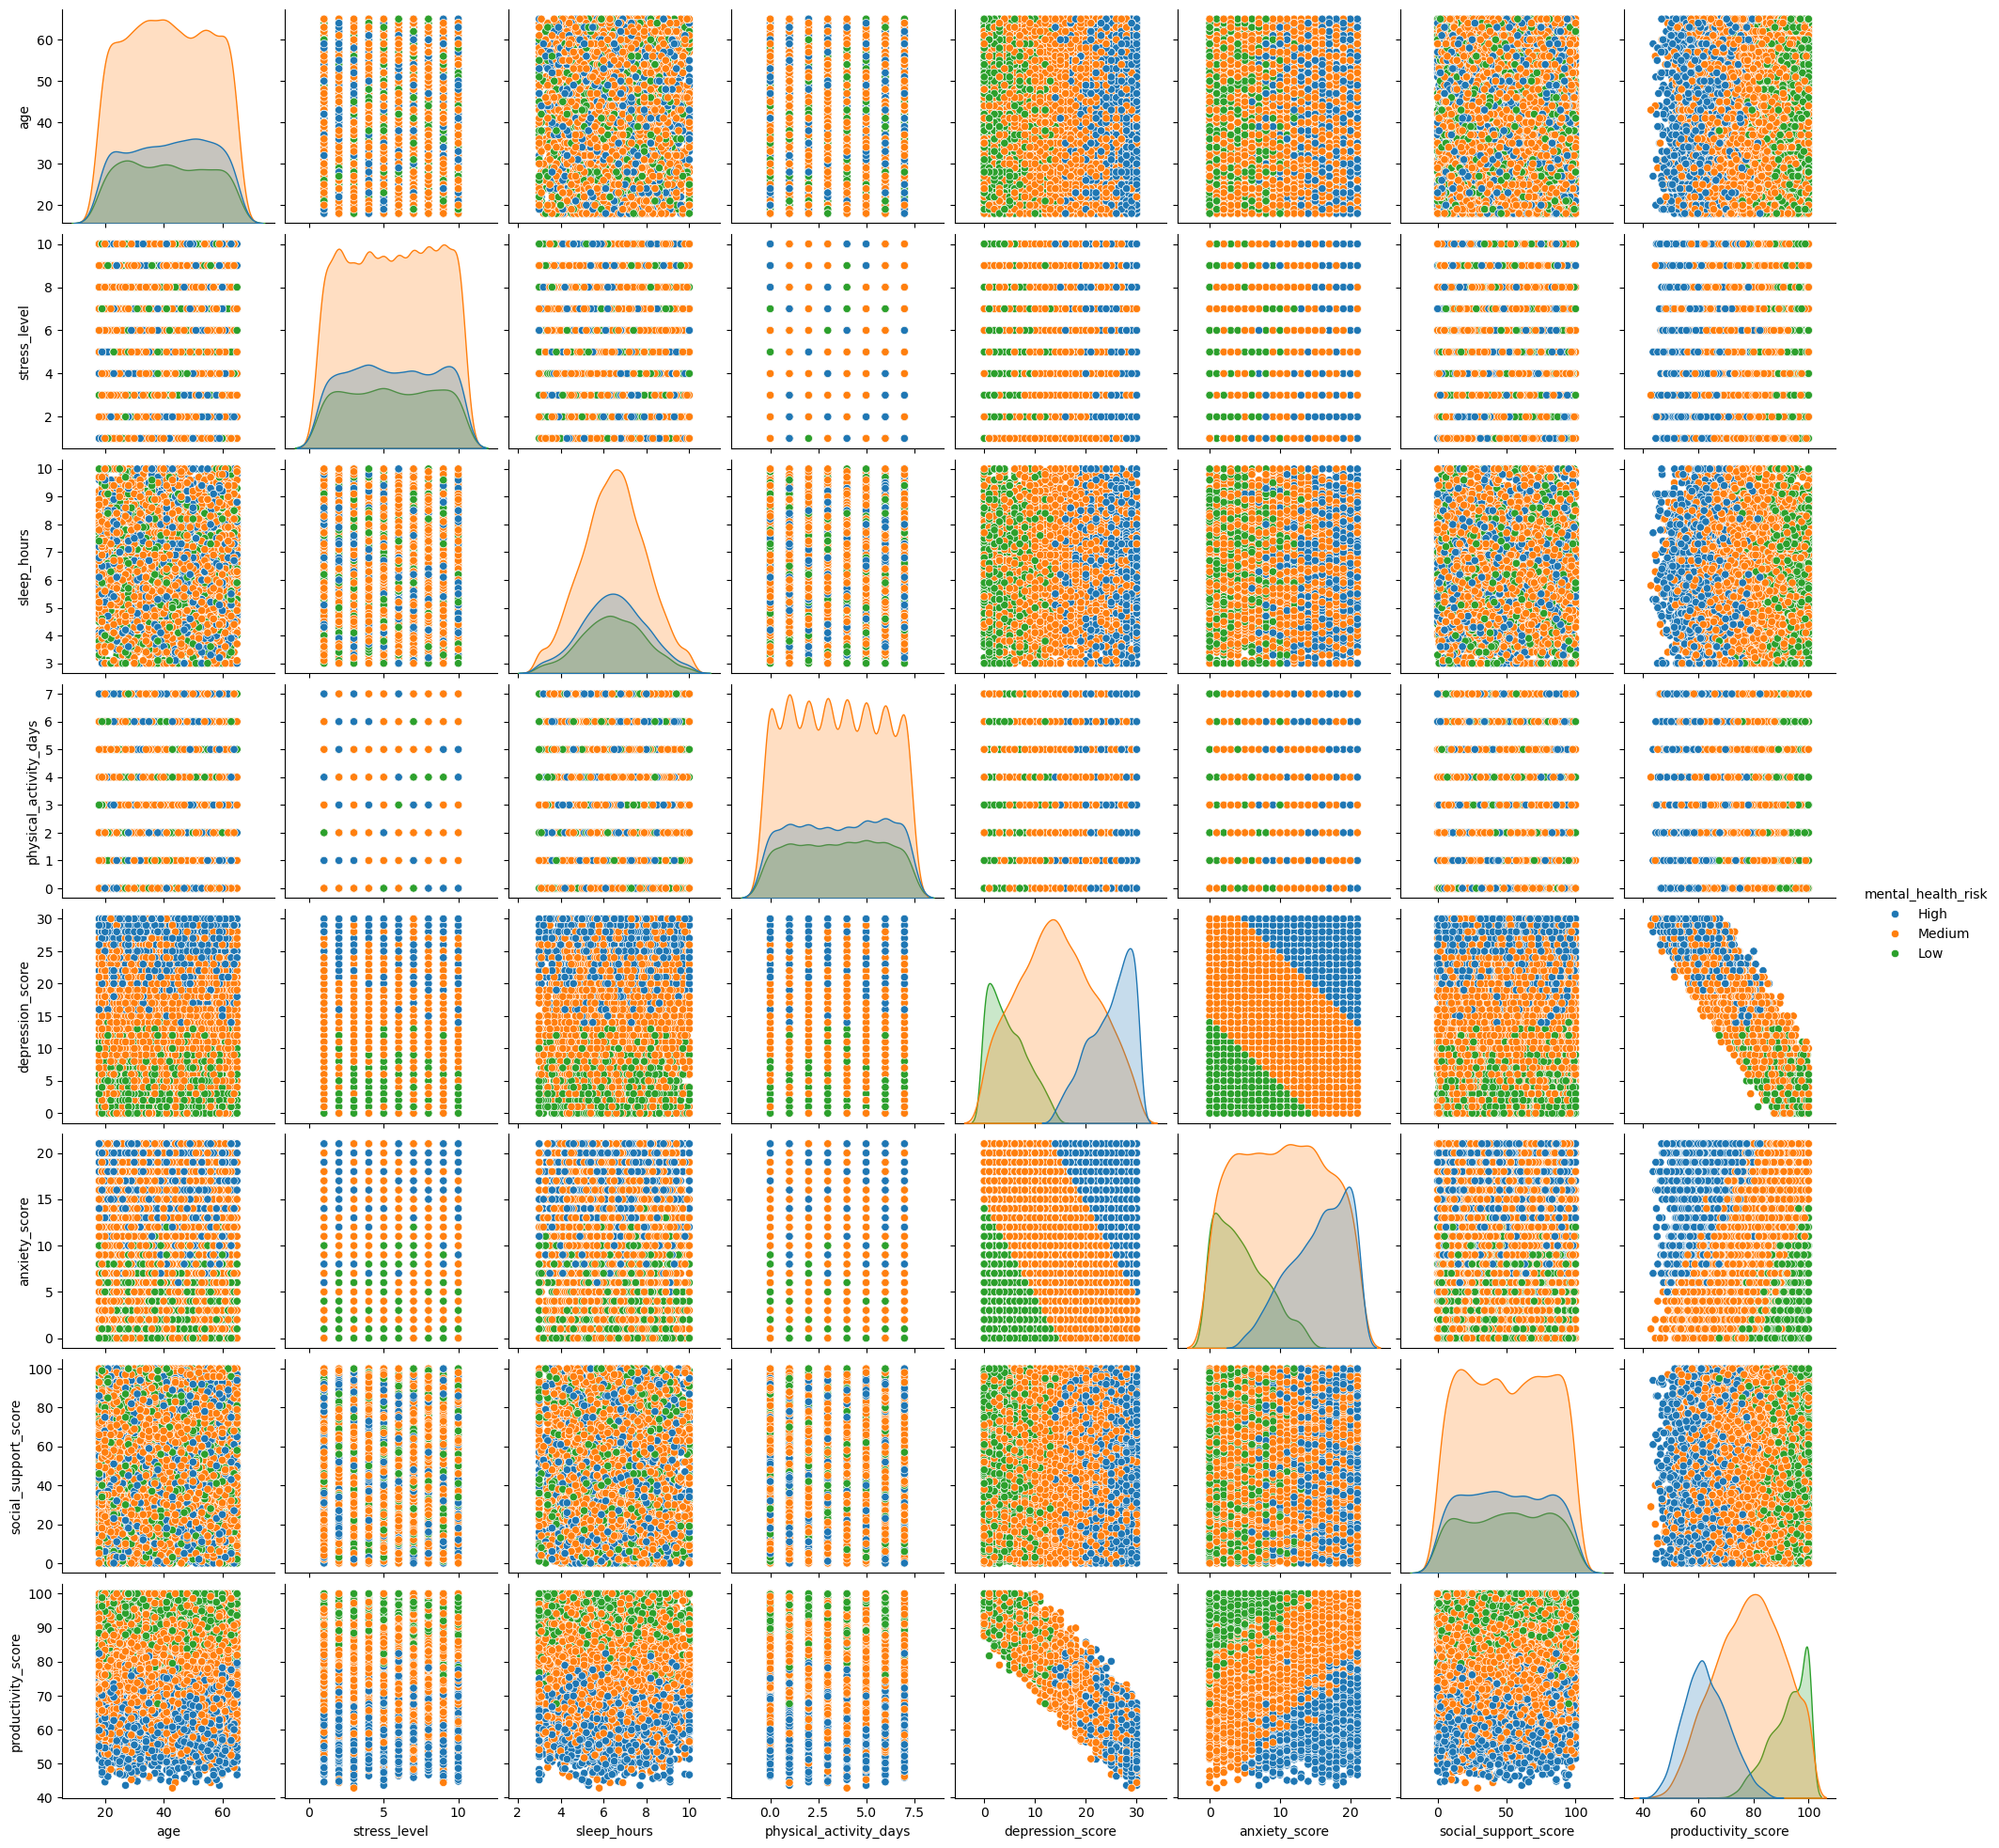

In [12]:
numerical_columns = ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score',
                     'anxiety_score', 'social_support_score', 'productivity_score']
sns.pairplot(NB[numerical_columns + ['mental_health_risk']], hue='mental_health_risk')
plt.show()


## Data Preprocessing
- Convert categorical variables (object type columns) into numerical values using techniques like:
    - Label Encoding: Assigns a unique integer value to each category.
    - One-Hot Encoding: Creates binary columns for each category.
- Since Naive Bayes requires categorical features, we'll use Label Encoding for the target variable and One-Hot Encoding for the feature variables.

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

## Define preprocessing steps

In [14]:
categorical_features = ['gender', 'employment_status', 'work_environment',
                        'mental_health_history', 'seeks_treatment']
            
numeric_features = ['age', 'stress_level', 'sleep_hours', 'physical_activity_days',
                    'depression_score', 'anxiety_score',
                    'social_support_score', 'productivity_score']

## One-Hot Encoding for categorical features

In [15]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

## Define transformers

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()


## No scaling needed for Naive Bayes

In [18]:
preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_features)],
    remainder='passthrough')

## Label Encoding for the target variable

In [19]:
le = LabelEncoder()  
NB['mental_health_risk'] = le.fit_transform(NB['mental_health_risk'])  

## Split Data into Training and Testing Sets
- Split the preprocessed data into training and testing sets using techniques like:
    - Train-Test Split: Splits data into training and testing sets.

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = NB.drop('mental_health_risk', axis=1)
y = NB['mental_health_risk']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Apply Preprocessing

- Apply the preprocessing steps to the training and testing data.


In [23]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Model Training

- Train a Naive Bayes classifier using the training data.

In [24]:
from sklearn.naive_bayes import MultinomialNB

## Train a Multinomial Naive Bayes classifier

In [25]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

##  Model Evaluation

- Evaluate the performance of the model using metrics like:
    - Accuracy
    - Precision
    - Recall
    - F1-Score


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [27]:
from sklearn.pipeline import Pipeline

## Create a pipeline with preprocessing and model

In [28]:
model = Pipeline([ ('preprocessor', preprocessor),('classifier', MultinomialNB())])

### Split data into X and y

In [53]:
X = NB.drop('mental_health_risk', axis=1)
y = NB['mental_health_risk']

### Apply LabelEncoder to y

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Split data into training and testing sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model
- The Pipeline is used to chain the preprocessing and classification steps together.
- The fit method is used to train the model on the training data.
- The predict method is used to make predictions on the test data.



In [36]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'employment_status',
                                                   'work_environment',
                                                   'mental_health_history',
                                                   'seeks_treatment'])])),
                ('classifier', MultinomialNB())])

## Make predictions on the test set

In [39]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics

In [42]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.843
Precision: 0.8577827767470625
Recall: 0.843
F1-Score: 0.8440992407304495


# Print classification report

In [43]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       475
           1       0.77      0.90      0.83       359
           2       0.93      0.79      0.85      1166

    accuracy                           0.84      2000
   macro avg       0.82      0.87      0.84      2000
weighted avg       0.86      0.84      0.84      2000



In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set

In [47]:
from sklearn.naive_bayes import GaussianNB

## Create a pipeline with preprocessing and model

In [48]:
clf = Pipeline([('preprocessor', preprocessor),('classifier', GaussianNB())])

### Train the model

In [50]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'employment_status',
                                                   'work_environment',
                                                   'mental_health_history',
                                                   'seeks_treatment'])])),
                ('classifier', GaussianNB())])

In [56]:
y_pred = clf.predict(X_test)

### Create a confusion matrix

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
cm = confusion_matrix(y_test, y_pred)

### Plot the confusion matrix

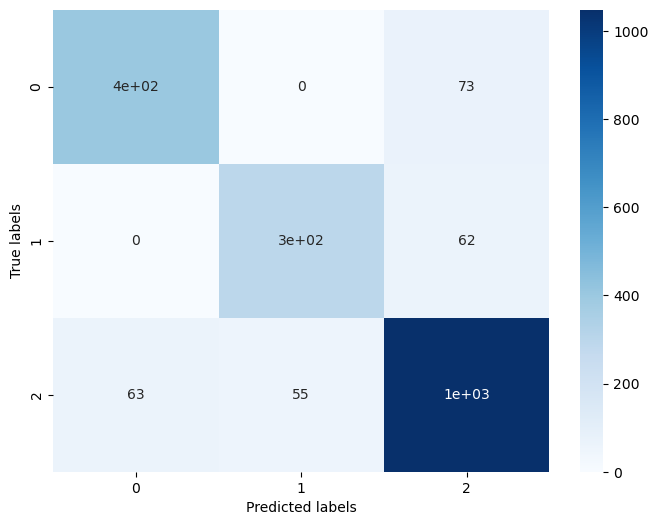

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Evaluate the model

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8735
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       475
           1       0.84      0.83      0.84       359
           2       0.89      0.90      0.89      1166

    accuracy                           0.87      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.87      0.87      0.87      2000

